In [1]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding, CuDNNGRU
from keras.layers.recurrent import LSTM
from keras.layers import Dropout
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras
from tensorflow.keras import metrics
from matplotlib import pyplot
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
from matplotlib import pyplot

In [2]:
dataset = pd.read_csv('veriler.csv')

In [3]:
dataset


tweet  group
0                         honor support hero fight folio      3
1                                                  agree      0
2      deangelohall willcompton redskins hata gun mon...      2
3      billgates new book exceptionally clear accessi...      0
4      recommend factfulness highly han family member...      3
...                                                  ...    ...
10449  second volunteer make call text voter use judg...      0
10450  suedhellmann division parent confidence child ...      3
10451  margin nearly americans believe senate hold he...      0
10452  wonder ll win team medium dmitri water war tom...      1
10453   learn maize wheat carlo slim commit great happen      3

[10454 rows x 2 columns]

In [4]:
dataset.drop(dataset.loc[dataset['group']==2].index,inplace=True)

In [5]:
dataset.drop(dataset.loc[dataset['group']==3].index, inplace=True)


In [6]:
dataset

tweet  group
1                                                  agree      0
3      billgates new book exceptionally clear accessi...      0
5                 president drama birthday wish happy th      0
6            chocolate amp headbutts team amp kind night      1
8      judge merrily grand deserves fair consideratio...      0
...                                                  ...    ...
10440  watch weekly address president drama talk comm...      0
10442  live president drama speaking champion change ...      0
10449  second volunteer make call text voter use judg...      0
10451  margin nearly americans believe senate hold he...      0
10452  wonder ll win team medium dmitri water war tom...      1

[4834 rows x 2 columns]

In [7]:
dataset=dataset.reset_index()

In [8]:
dataset

index                                              tweet  group
0         1                                              agree      0
1         3  billgates new book exceptionally clear accessi...      0
2         5             president drama birthday wish happy th      0
3         6        chocolate amp headbutts team amp kind night      1
4         8  judge merrily grand deserves fair consideratio...      0
...     ...                                                ...    ...
4829  10440  watch weekly address president drama talk comm...      0
4830  10442  live president drama speaking champion change ...      0
4831  10449  second volunteer make call text voter use judg...      0
4832  10451  margin nearly americans believe senate hold he...      0
4833  10452  wonder ll win team medium dmitri water war tom...      1

[4834 rows x 3 columns]

In [9]:
dataset.drop(["index"],axis=1,inplace=True)

In [10]:
dataset

tweet  group
0                                                 agree      0
1     billgates new book exceptionally clear accessi...      0
2                president drama birthday wish happy th      0
3           chocolate amp headbutts team amp kind night      1
4     judge merrily grand deserves fair consideratio...      0
...                                                 ...    ...
4829  watch weekly address president drama talk comm...      0
4830  live president drama speaking champion change ...      0
4831  second volunteer make call text voter use judg...      0
4832  margin nearly americans believe senate hold he...      0
4833  wonder ll win team medium dmitri water war tom...      1

[4834 rows x 2 columns]

In [11]:
targets=dataset["group"]

In [12]:
targets

0       0
1       0
2       0
3       1
4       0
       ..
4829    0
4830    0
4831    0
4832    0
4833    1
Name: group, Length: 4834, dtype: int64

In [13]:
inputs=dataset["tweet"]

In [14]:
inputs

0                                                   agree
1       billgates new book exceptionally clear accessi...
2                  president drama birthday wish happy th
3             chocolate amp headbutts team amp kind night
4       judge merrily grand deserves fair consideratio...
                              ...                        
4829    watch weekly address president drama talk comm...
4830    live president drama speaking champion change ...
4831    second volunteer make call text voter use judg...
4832    margin nearly americans believe senate hold he...
4833    wonder ll win team medium dmitri water war tom...
Name: tweet, Length: 4834, dtype: object

In [15]:
len(inputs)

4834

In [16]:
kes=int(len(inputs)*0.8)

In [17]:
kes

3867

In [18]:
x_train,x_test=inputs[:kes],inputs[kes:]

In [19]:
x_train

0                                                   agree
1       billgates new book exceptionally clear accessi...
2                  president drama birthday wish happy th
3             chocolate amp headbutts team amp kind night
4       judge merrily grand deserves fair consideratio...
                              ...                        
3862      see cocktail night decide go love music opening
3863    fight tackle climate change take big step frid...
3864    economy add job august record break consecutiv...
3865    time year america crime rate incarceration rat...
3866                       leave enter march contest team
Name: tweet, Length: 3867, dtype: object

In [20]:
x_test

3867    today announce nearly million new public priva...
3868    sweet dream kind want watch interview empire n...
3869    make sure sign chance state tax teacher awesom...
3870                                            hunt team
3871    tom cruise wednesday ride hollywood pick tom l...
                              ...                        
4829    watch weekly address president drama talk comm...
4830    live president drama speaking champion change ...
4831    second volunteer make call text voter use judg...
4832    margin nearly americans believe senate hold he...
4833    wonder ll win team medium dmitri water war tom...
Name: tweet, Length: 967, dtype: object

In [21]:
y_train,y_test=targets[:kes],targets[kes:]

In [22]:
y_train

0       0
1       0
2       0
3       1
4       0
       ..
3862    1
3863    0
3864    0
3865    0
3866    1
Name: group, Length: 3867, dtype: int64

In [23]:
x_train[100]

'look way help get elect find opportunity volunteer'

In [24]:
y_train[100]

0

In [25]:
kelime_sayisi=4000

In [26]:
tokenizer=Tokenizer(num_words=kelime_sayisi)

In [27]:
tokenizer.fit_on_texts(inputs)

In [28]:
tokenizer.word_index

{'president': 1,
 'team': 2,
 'drama': 3,
 'tom': 4,
 'make': 5,
 'get': 6,
 'amp': 7,
 'day': 8,
 'change': 9,
 're': 10,
 'work': 11,
 'today': 12,
 'year': 13,
 'love': 14,
 'american': 15,
 'time': 16,
 'cruise': 17,
 'vote': 18,
 'watch': 19,
 'good': 20,
 'see': 21,
 've': 22,
 'help': 23,
 'people': 24,
 'need': 25,
 'take': 26,
 'go': 27,
 'new': 28,
 'climate': 29,
 'live': 30,
 'gun': 31,
 'like': 32,
 'fight': 33,
 'leader': 34,
 'll': 35,
 'senate': 36,
 'job': 37,
 'world': 38,
 'great': 39,
 'fan': 40,
 'country': 41,
 'right': 42,
 'state': 43,
 'add': 44,
 'read': 45,
 'america': 46,
 'know': 47,
 'look': 48,
 'family': 49,
 'let': 50,
 'come': 51,
 'health': 52,
 'want': 53,
 'say': 54,
 'movie': 55,
 'join': 56,
 'way': 57,
 'happy': 58,
 'million': 59,
 'congress': 60,
 'awesome': 61,
 'them': 62,
 'don': 63,
 'care': 64,
 'keep': 65,
 'economy': 66,
 'community': 67,
 'plan': 68,
 'progress': 69,
 'chance': 70,
 'support': 71,
 'pick': 72,
 'sign': 73,
 'court': 74,

In [29]:
inputs_tokens=tokenizer.texts_to_sequences(inputs)

In [30]:
inputs_tokens

[[107],
 [2629,
  28,
  210,
  1954,
  407,
  1955,
  1328,
  29,
  9,
  2630,
  2631,
  654,
  246,
  1580,
  2632,
  1956,
  106,
  543,
  1957,
  134,
  1329,
  2633],
 [1, 3, 103, 166, 58, 117],
 [1958, 7, 1330, 2, 7, 332, 137],
 [80, 453, 82, 432, 76, 827, 36],
 [408, 18, 113, 390, 121, 333, 277],
 [1023, 1159, 110, 70, 106, 1, 3, 119],
 [221, 50, 47, 179, 27, 828, 8, 7, 253, 32],
 [20, 8, 46, 50, 6, 11, 1, 3],
 [2634, 87, 24, 829, 1, 3],
 [150, 114, 1959, 454, 80, 1960, 1160, 56, 306, 514, 266],
 [577, 35, 21, 101, 1024, 2635],
 [19, 63, 247, 239, 96, 12],
 [1581, 1161, 830],
 [14, 1961, 21, 135, 334, 315, 7, 135],
 [120, 119, 70, 106, 1, 3],
 [23,
  28,
  167,
  34,
  5,
  515,
  455,
  465,
  1025,
  122,
  3,
  34,
  920,
  11,
  23,
  921,
  335,
  347,
  922,
  5,
  38,
  1026],
 [28, 211, 1962, 72, 1162, 409, 336, 516, 7, 4, 831, 764, 433],
 [150, 114, 1, 3, 1027, 1028, 2636, 201, 168, 410],
 [16, 2637, 1, 306, 1582],
 [73, 411, 166, 1, 3, 58, 103],
 [19, 2638, 1583, 1, 3, 

In [31]:
len(inputs_tokens)

4834

In [32]:
token_sayisi=[len(tokens) for tokens in inputs_tokens]

In [33]:
token_sayisi

[1,
 22,
 6,
 7,
 7,
 7,
 8,
 10,
 8,
 6,
 11,
 6,
 6,
 3,
 8,
 6,
 22,
 13,
 10,
 5,
 7,
 6,
 1,
 6,
 23,
 8,
 7,
 8,
 13,
 23,
 12,
 8,
 12,
 9,
 9,
 1,
 6,
 12,
 7,
 6,
 10,
 10,
 9,
 5,
 9,
 24,
 4,
 8,
 13,
 12,
 4,
 4,
 11,
 10,
 10,
 4,
 18,
 6,
 10,
 10,
 11,
 7,
 10,
 7,
 23,
 9,
 7,
 5,
 11,
 23,
 15,
 7,
 2,
 11,
 25,
 11,
 7,
 6,
 21,
 10,
 7,
 11,
 8,
 5,
 7,
 3,
 6,
 8,
 10,
 8,
 7,
 13,
 8,
 4,
 12,
 9,
 11,
 13,
 16,
 6,
 8,
 23,
 5,
 11,
 11,
 6,
 5,
 4,
 7,
 10,
 7,
 11,
 11,
 12,
 5,
 5,
 8,
 3,
 11,
 9,
 9,
 12,
 5,
 5,
 6,
 16,
 12,
 7,
 11,
 7,
 8,
 9,
 6,
 8,
 9,
 5,
 11,
 11,
 10,
 8,
 9,
 22,
 1,
 2,
 11,
 6,
 9,
 8,
 9,
 23,
 8,
 6,
 5,
 8,
 8,
 9,
 4,
 3,
 8,
 6,
 7,
 6,
 5,
 5,
 18,
 7,
 7,
 9,
 11,
 8,
 9,
 6,
 7,
 10,
 10,
 14,
 7,
 8,
 2,
 7,
 24,
 3,
 3,
 10,
 10,
 10,
 8,
 11,
 6,
 11,
 14,
 7,
 8,
 10,
 8,
 17,
 9,
 6,
 10,
 11,
 4,
 10,
 21,
 6,
 6,
 9,
 7,
 1,
 5,
 8,
 4,
 8,
 8,
 7,
 12,
 1,
 4,
 12,
 8,
 12,
 6,
 8,
 24,
 7,
 7,
 11,
 7,
 12,
 8,
 

In [34]:
token_sayisi=np.array(token_sayisi)

In [35]:
np.mean(token_sayisi)

8.835126189491104

In [36]:
np.max(token_sayisi)

30

In [37]:
np.argmax(token_sayisi)

838

In [38]:
inputs_tokens[838]

[2161,
 1256,
 23,
 49,
 155,
 1192,
 174,
 715,
 1107,
 987,
 59,
 441,
 1257,
 5,
 52,
 64,
 232,
 1456,
 803,
 234,
 885,
 1399,
 558,
 3002,
 290,
 5,
 383,
 43,
 215,
 320]

In [39]:
inputs[838]

'landmark legislation help family pay rent put food table lift million child poverty make health care unfordable aid small business fund broad base vaccination effort make easy state open school'

In [40]:
max_tokens=np.mean(token_sayisi)+2*np.std(token_sayisi)

In [41]:
max_tokens

18.108146636520516

In [42]:
max_tokens=18

In [43]:
np.sum(token_sayisi<max_tokens)/len(token_sayisi)

0.9282167976830782

In [44]:
inputs_pad=pad_sequences(inputs_tokens, maxlen=max_tokens)

In [45]:
inputs_tokens[0]

[107]

In [46]:
inputs_pad[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 107])

In [47]:
inputs_pad[838]

array([1257,    5,   52,   64,  232, 1456,  803,  234,  885, 1399,  558,
       3002,  290,    5,  383,   43,  215,  320])

In [48]:
inputs_pad.shape

(4834, 18)

In [49]:
#kes=int(len(inputs_pad)*0.8)


In [50]:
#kes

In [51]:
#x_train_pad,x_test_pad=inputs_pad[:kes],inputs_pad[kes:]

In [52]:
embedding_size=32

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 18, 32)            128000    
_________________________________________________________________
gru (GRU)                    (None, 18, 16)            2352      
_________________________________________________________________
lstm (LSTM)                  (None, 18, 8)             800       
_________________________________________________________________
lstm_1 (LSTM)                (None, 4)                 208       
_________________________________________________________________
dropout (Dropout)            (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 131,365
Trainable params: 131,365
Non-trainable params: 0
__________________________________________________

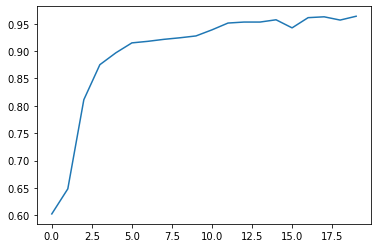

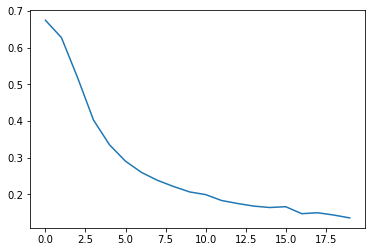

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 18, 32)            128000    
_________________________________________________________________
gru_1 (GRU)                  (None, 18, 16)            2352      
_________________________________________________________________
lstm_2 (LSTM)                (None, 18, 8)             800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 4)                 208       
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 131,365
Trainable params: 131,365
Non-trainable params: 0
________________________________________________

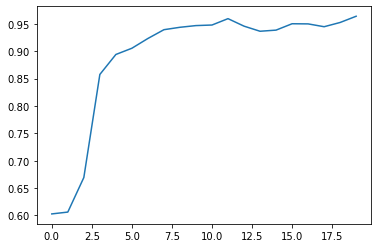

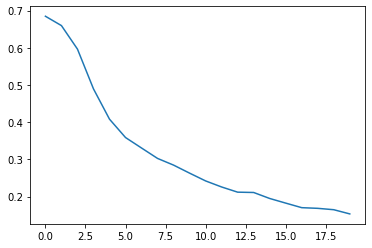

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 18, 32)            128000    
_________________________________________________________________
gru_2 (GRU)                  (None, 18, 16)            2352      
_________________________________________________________________
lstm_4 (LSTM)                (None, 18, 8)             800       
_________________________________________________________________
lstm_5 (LSTM)                (None, 4)                 208       
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 131,365
Trainable params: 131,365
Non-trainable params: 0
________________________________________________

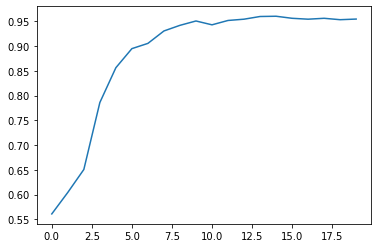

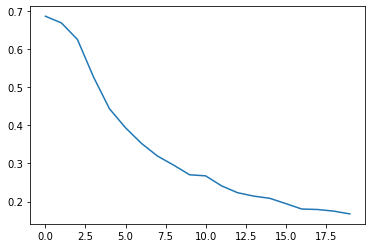

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 18, 32)            128000    
_________________________________________________________________
gru_3 (GRU)                  (None, 18, 16)            2352      
_________________________________________________________________
lstm_6 (LSTM)                (None, 18, 8)             800       
_________________________________________________________________
lstm_7 (LSTM)                (None, 4)                 208       
_________________________________________________________________
dropout_3 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 131,365
Trainable params: 131,365
Non-trainable params: 0
________________________________________________

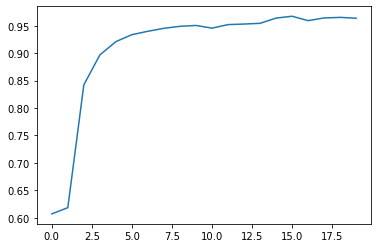

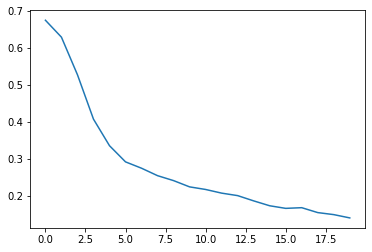

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 18, 32)            128000    
_________________________________________________________________
gru_4 (GRU)                  (None, 18, 16)            2352      
_________________________________________________________________
lstm_8 (LSTM)                (None, 18, 8)             800       
_________________________________________________________________
lstm_9 (LSTM)                (None, 4)                 208       
_________________________________________________________________
dropout_4 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 131,365
Trainable params: 131,365
Non-trainable params: 0
________________________________________________

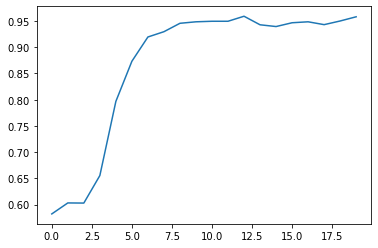

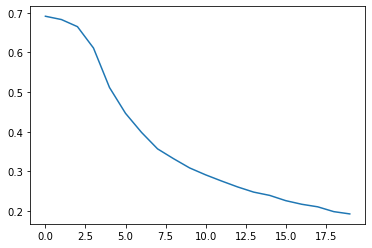

In [53]:
kfold=KFold(n_splits=5, shuffle=True, random_state=5)
for train,test in kfold.split(inputs_pad,targets):
    x_train,x_test,y_train,y_test=inputs_pad[train],inputs_pad[test],targets[train],targets[test]
    model=Sequential()
    model.add(Embedding(input_dim=kelime_sayisi,output_dim=embedding_size,
                   input_length=max_tokens,name="embedding_layer" ))
    model.add(GRU(units=16, return_sequences=True))
    model.add(LSTM(units=8, return_sequences=True ))
    model.add(LSTM(units=4 ))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(loss="binary_crossentropy",optimizer='adam', metrics=["accuracy"])
    model.summary()
    train=model.fit(x_train,y_train,epochs=20, batch_size=256)
    result=model.evaluate(x_test,y_test)
    pyplot.plot(train.history['accuracy'])
    pyplot.show()
    pyplot.plot(train.history['loss'])
    pyplot.show()
